In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
def RMSE(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))
import plotly.graph_objs as go
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.rc('figure',figsize=(20,11))

In [47]:
data = pd.read_csv('/Users/ashishgohil/programming/data analysis/projects/project2/top50.csv',encoding='ISO-8859-1')
data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [38]:
data.drop(data.columns[0], axis=1, inplace=True) # removing the first column of "unnamed"
data.head(5)

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [12]:
info = data.describe()
info.loc['skew'] = data.skew()
info.loc['kurtosis'] =data.kurt()
info.loc['median'] =data.median()
info.loc['iqr'] = info.loc['75%']-info.loc['25%']
info

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.380000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.929880,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.000000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.000000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.500000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.750000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.000000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000
skew,0.854504,-0.453199,-1.379891,-0.831915,2.203937,-0.046490,0.748554,1.135290,1.377581,-1.503434
kurtosis,-0.577184,-0.706359,2.767259,1.021652,4.858902,-0.806982,1.159347,0.514041,0.825746,3.709390


In [39]:
number_of_unique_artists = len(data['Artist.Name'].value_counts().to_list()) # unique artists count
number_of_unique_genres = len(data['Genre'].value_counts().to_list()) # unique genre count
print("Number Of Unique Artists: ",number_of_unique_artists,' | ',' Number Of Unique Genres: ',number_of_unique_genres)

Number Of Unique Artists:  38  |   Number Of Unique Genres:  21


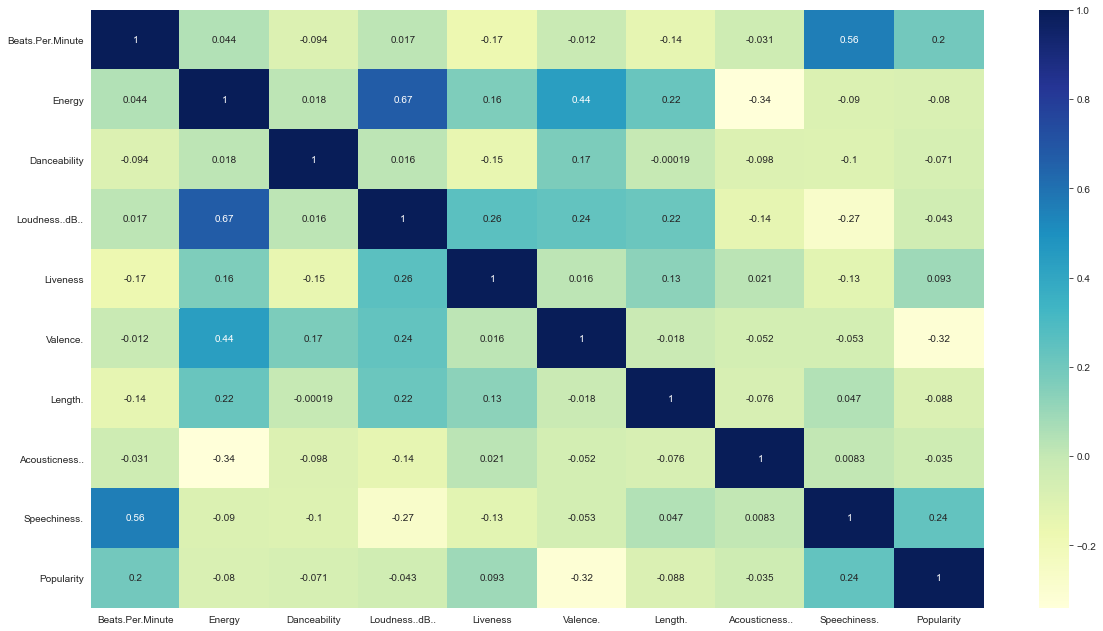

In [42]:
corrs = data.corr() # correlation to create heatmap with seaborn
ax = sns.heatmap(corrs, cmap='YlGnBu', annot=True) # ax : axis in which to draw the plot, cmap is color , True becuase we need values inside the map

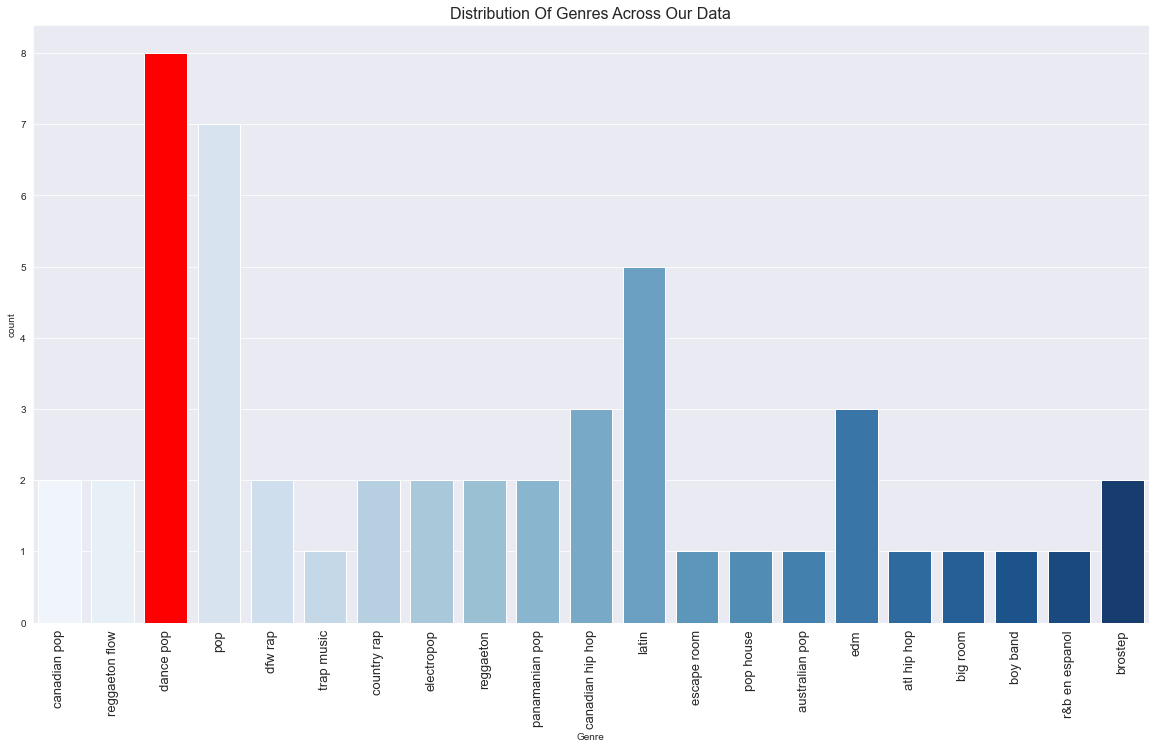

In [35]:
ax = sns.countplot(data['Genre'],palette='Blues') # seaborn countplot in blue color
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13) # placing the labels in x axis in 90 degrees
ax.set_title('Distribution Of Genres Across Our Data',fontsize=16) # title
ax.patches[2].set_fc('r') # color of red to display most played genre

In [49]:
main_genres = ['rock','pop','blues','hip hop','jazz','reggae','techno','trap','regga','rap','r&b']
def check_genre(sir):
    for word in main_genres:
        if sir.find(word) != -1:
            if word == 'rap':
                return 'hip hop'
            else:
                return word
    return sir

data['Main.Genre'] = data['Genre'].apply(check_genre)


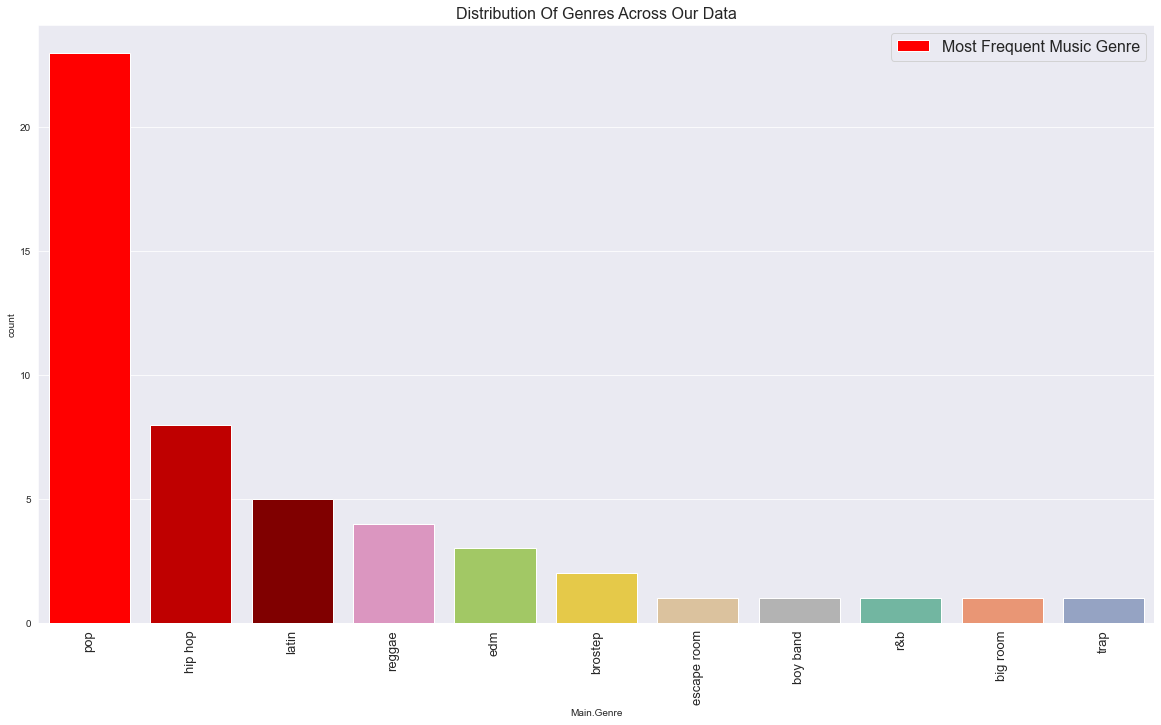

In [69]:
ax = sns.countplot(data['Main.Genre'], palette='Set2', order=data['Main.Genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13) # placing the labels in x axis in 90 degrees
ax.set_title('Distribution Of Genres Across Our Data',fontsize=16) # title
ax.patches[0].set_fc('r') # changed the color to red for 0 index value
ax.patches[1].set_fc((0.75,0,0)) # change the color of the bar in 1st value, color is in RGB
ax.patches[2].set_fc((0.50,0,0)) # change the color of the bar in 2nd value, color is in RGB
plt.legend({'Most Frequent Music Genre': 0}, prop={'size':'16'}) # thing on the top right side
plt.show() # to show the chart

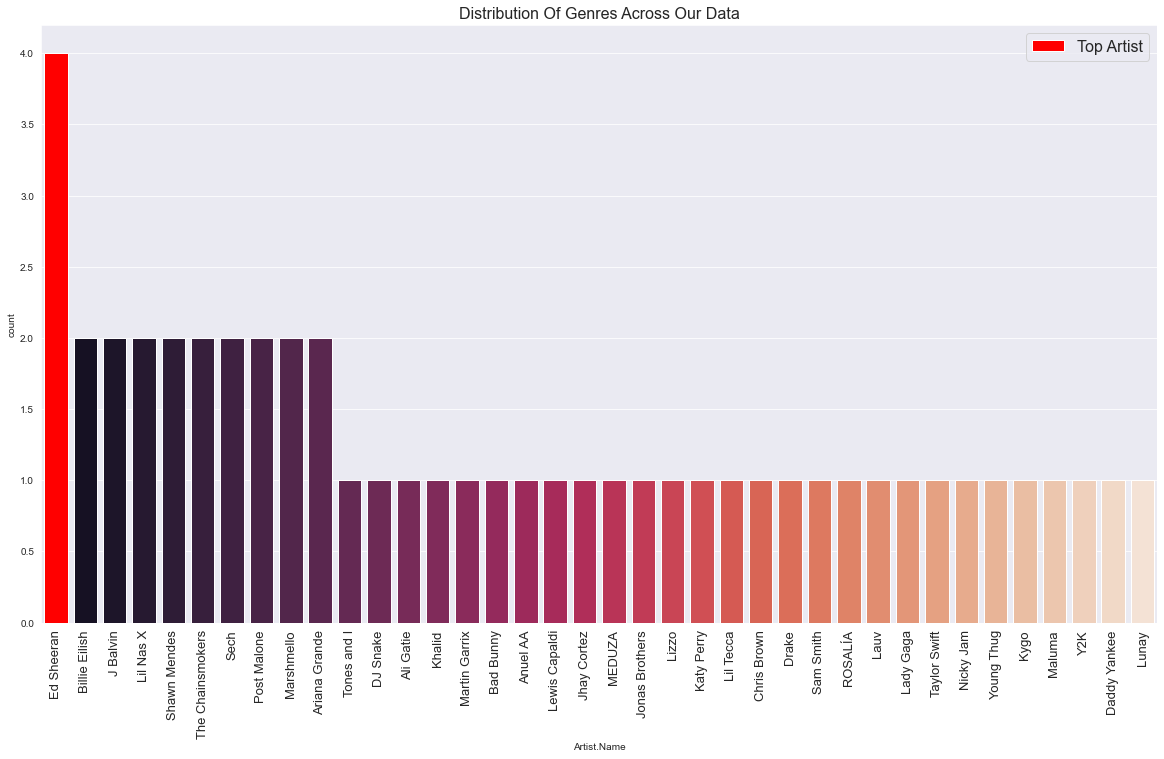

In [82]:
ax = sns.countplot(data['Artist.Name'], palette='rocket', order=data['Artist.Name'].value_counts().index,label='Top Artist')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13) # placing the labels in x axis in 90 degrees
ax.set_title('Distribution Of Genres Across Our Data',fontsize=16) # title
ax.patches[0].set_fc('r') # changed the color to red for 0 index value
plt.legend(prop={'size':'16'}) # thing on the top right side
plt.show() # to show the chart

In [83]:
top_10_artist = data['Artist.Name'].value_counts()[:10]
top_10_genres = data['Genre'].value_counts()[:10]
top_10_songs = data.iloc[data['Popularity'].nlargest(10).index,:]
top_10_artist.to_frame()
top_10_songs

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Main.Genre,Artist.Gender
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,pop,F
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,hip hop,M
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93,reggae,M
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,reggae,M
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,trap,M
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92,hip hop,M
17,18,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91,hip hop,M
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91,escape room,F
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91,pop,M
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91,hip hop,M


In [84]:
gender = {'Ed Sheeran':'M','The Chainsmokers':'Group','Shawn Mendes':'M','Post Malone':'M','Sech':'M','Marshmello':'M','Billie Eilish':'F','J Balvin':'M',
         'Lil Nas X':'M','Ariana Grande':'F','Daddy Yankee':'M','Y2K':'M','DJ Snake':'M','Lewis Capaldi':'M','Chris Brown':'M','Khalid':'M','Lizzo':'F','Lauv':'M',
         'Kygo':'M','Ali Gatie':'M','Lady Gaga':'F','Bad Bunny':'M','Lunay':'M','Sam Smith':'M','Anuel AA':'M','Nicky Jam':'M','Lil Tecca':'M','ROSALÍA':'F','Young Thug':'M',
         'Martin Garrix':'M','Katy Perry':'F','Jhay Cortez':'M','Drake':'M','Tones and I':'F','Taylor Swift':'F','Jonas Brothers':'Group','MEDUZA':'M','Maluma':'M'}
data['Artist.Gender'] = data['Artist.Name'].apply(lambda x: gender[x])

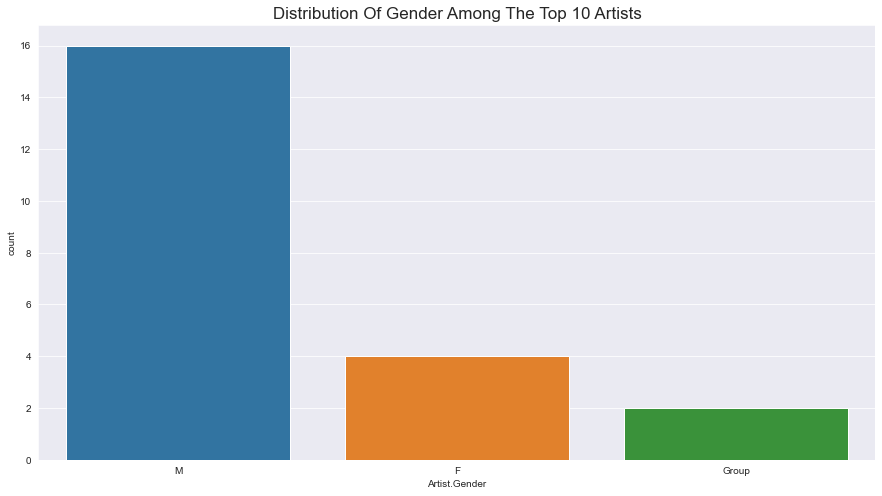

In [86]:
plt.figure(figsize=(15,8)) # chart size
ax = sns.countplot(top_10_arist_df['Artist.Gender'])
ax.set_title('Distribution Of Gender Among The Top 10 Artists',fontsize=17)
plt.show()

In [89]:
ex.scatter_polar(data, theta='Main.Genre', r='Beats.Per.Minute', color='Popularity', title='Spread of different genre popularity according to beats per minute')
# scatter polar, theta & r -> name of the column to target which is used for position marking 
# color patter is popularity & title 

In [92]:
ex.density_heatmap(data,x='Beats.Per.Minute', y='Popularity',title='Popularity counts according to BPM ')
# density heatmap, x & y axis column name which data we need and title